In [1]:
# imports 
import numpy as np
from math import sqrt 
from pprint import pprint
from numpy import array
from scipy.io import arff
import pandas as pd
from time import time

In [2]:
# load data
 
df=pd.read_csv('Waveform_withoutdupl_norm_v01.csv')  
del df['id']
del df['Unnamed: 0']
df['outlier'] = df.outlier.apply(lambda label: 1 if label == "'yes'" else 0)
df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att13,att14,att15,att16,att17,att18,att19,att20,att21,outlier
0,0.323657,0.793785,0.848661,0.660063,0.622244,0.755102,0.760762,0.671655,0.603723,0.636170,...,0.281899,0.203557,0.286607,0.474383,0.352483,0.358857,0.275626,0.465937,0.220884,1
1,0.423803,0.769774,0.632130,0.572471,0.747495,0.670408,0.715232,0.617958,0.637411,0.457447,...,0.302671,0.375494,0.296429,0.383302,0.545278,0.394286,0.451025,0.470803,0.468541,1
2,0.477504,0.580508,0.554133,0.476538,0.851703,0.509184,0.745861,0.785211,0.508865,0.519149,...,0.341246,0.384387,0.229464,0.350095,0.117819,0.406857,0.149203,0.402676,0.370817,1
3,0.645864,0.570621,0.525029,0.631908,0.682365,0.382653,0.478477,0.608275,0.476950,0.190426,...,0.500495,0.555336,0.463393,0.537951,0.564752,0.485714,0.576310,0.518248,0.597055,1
4,0.219158,0.690678,0.530850,0.715328,0.687375,0.571429,0.649007,0.562500,0.523050,0.303191,...,0.190900,0.408103,0.322321,0.425996,0.400195,0.701714,0.515945,0.294404,0.463186,1


In [3]:
df.shape

(3443, 22)

In [4]:
# data to values
df = df.values

In [5]:
# DeepExtratTrees  
import argparse
import sys
import pickle
from sklearn.metrics import accuracy_score
sys.path.insert(0, "lib")
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
config = load_json("./examples/waveform.json")
gc = GCForest(config)

In [6]:
# train test 
from sklearn.cross_validation import train_test_split
y = df[:,21]
X = df[:,0:21]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# number of class
len(np.unique(y_train))

2

In [8]:
             # X_enc is the concatenated predict_proba result of DeepExtratTrees

X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
   

[ 2018-07-28 00:22:20,279][cascade_classifier.fit_transform] X_groups_train.shape=[(2306, 21)],y_train.shape=(2306,),X_groups_test.shape=[(1137, 21)],y_test.shape=(1137,)
[ 2018-07-28 00:22:20,280][cascade_classifier.fit_transform] group_dims=[21]
[ 2018-07-28 00:22:20,281][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-28 00:22:20,282][cascade_classifier.fit_transform] group_ends=[21]
[ 2018-07-28 00:22:20,283][cascade_classifier.fit_transform] X_train.shape=(2306, 21),X_test.shape=(1137, 21)
[ 2018-07-28 00:22:20,285][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2306, 21), X_cur_test.shape=(1137, 21)
[ 2018-07-28 00:22:20,824][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=96.97%
[ 2018-07-28 00:22:21,674][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=96.97%
[ 2018-07-28 00:22:22,522][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 -

In [9]:
# predict
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of DeepExtratTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-28 00:22:28,577][cascade_classifier.transform] X_groups_test.shape=[(1137, 21)]
[ 2018-07-28 00:22:28,578][cascade_classifier.transform] group_dims=[21]
[ 2018-07-28 00:22:28,579][cascade_classifier.transform] X_test.shape=(1137, 21)
[ 2018-07-28 00:22:28,580][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(1137, 21)


Test Accuracy of DeepExtratTrees = 97.185576 %
[[1104    0]
 [  32    1]]


             precision    recall  f1-score   support

        0.0       0.97      1.00      0.99      1104
        1.0       1.00      0.03      0.06        33

avg / total       0.97      0.97      0.96      1137



In [10]:
# Make data + estimators
X_test_enc = gc.transform(X_test)
X_train_enc = X_train_enc.reshape((X_train_enc.shape[0], -1))
X_test_enc = X_test_enc.reshape((X_test_enc.shape[0], -1))
X_train_origin = X_train.reshape((X_train.shape[0], -1))
X_test_origin = X_test.reshape((X_test.shape[0], -1))
X_train_enc = np.hstack((X_train_origin, X_train_enc))
X_test_enc = np.hstack((X_test_origin, X_test_enc))

[ 2018-07-28 00:22:30,247][cascade_classifier.transform] X_groups_test.shape=[(1137, 21)]
[ 2018-07-28 00:22:30,248][cascade_classifier.transform] group_dims=[21]
[ 2018-07-28 00:22:30,249][cascade_classifier.transform] X_test.shape=(1137, 21)
[ 2018-07-28 00:22:30,250][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(1137, 21)


In [11]:
X_train=X_train_enc
X_test=X_test_enc 
X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)

[ 2018-07-28 00:22:31,411][cascade_classifier.fit_transform] X_groups_train.shape=[(2306, 23)],y_train.shape=(2306,),X_groups_test.shape=[(1137, 23)],y_test.shape=(1137,)
[ 2018-07-28 00:22:31,412][cascade_classifier.fit_transform] group_dims=[23]
[ 2018-07-28 00:22:31,414][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-28 00:22:31,415][cascade_classifier.fit_transform] group_ends=[23]
[ 2018-07-28 00:22:31,415][cascade_classifier.fit_transform] X_train.shape=(2306, 23),X_test.shape=(1137, 23)
[ 2018-07-28 00:22:31,417][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2306, 23), X_cur_test.shape=(1137, 23)
[ 2018-07-28 00:22:31,905][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.40%
[ 2018-07-28 00:22:32,498][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.84%
[ 2018-07-28 00:22:33,235][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 -

In [12]:
# predict  data + Es
y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of DeepExtratTrees = {:.6f} %".format(acc * 100))
 # Matrix de confusion
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[ 2018-07-28 00:22:38,078][cascade_classifier.transform] X_groups_test.shape=[(1137, 23)]
[ 2018-07-28 00:22:38,079][cascade_classifier.transform] group_dims=[23]
[ 2018-07-28 00:22:38,080][cascade_classifier.transform] X_test.shape=(1137, 23)
[ 2018-07-28 00:22:38,081][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(1137, 23)


Test Accuracy of DeepExtratTrees = 97.889182 %
[[1104    0]
 [  24    9]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1104
        1.0       1.00      0.27      0.43        33

avg / total       0.98      0.98      0.97      1137



In [13]:
def update(X_train,X_test):
    # update Estimators
    M = np.delete(X_train, (-1), axis=1)
    X_train= np.delete(M, (-1), axis=1)
    M = np.delete(X_test, (-1), axis=1)
    X_test = np.delete(M, (-1), axis=1)
    return X_train,X_test

def newdata(X_test_enc, X_train_enc):
    # Make Data + Estimators
    X_train_origin = X_train.reshape((X_train.shape[0], -1))
    X_test_origin = X_test.reshape((X_test.shape[0], -1))
    X_train_enc = np.hstack((X_train_origin, X_train_enc))
    X_test_enc = np.hstack((X_test_origin, X_test_enc))
    return X_test_enc, X_train_enc

Accuracy = []
def affiche():
    # predict
    y_pred = gc.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Test Accuracy of DeepExtratTrees = {:.6f} %".format(acc * 100),"Layer :",i)
    Accuracy.append(round(acc*100 , 2))
    # Matrix de confusion
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print(classification_report(y_test,y_pred))
    
# Deep
t = []
for i in range (20):
    t0 = time()
    X_train,X_test=update(X_train,X_test)
    X_test_enc, X_train_enc=newdata(X_test_enc, X_train_enc)

    X_train=X_train_enc
    X_test=X_test_enc 
    X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
    tt = time() - t0
    affiche() 
    t.append(round(tt,2))
    print (" Time ",format(round(tt,3))," seconds")


[ 2018-07-28 00:22:39,274][cascade_classifier.fit_transform] X_groups_train.shape=[(2306, 23)],y_train.shape=(2306,),X_groups_test.shape=[(1137, 23)],y_test.shape=(1137,)
[ 2018-07-28 00:22:39,275][cascade_classifier.fit_transform] group_dims=[23]
[ 2018-07-28 00:22:39,276][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-07-28 00:22:39,277][cascade_classifier.fit_transform] group_ends=[23]
[ 2018-07-28 00:22:39,278][cascade_classifier.fit_transform] X_train.shape=(2306, 23),X_test.shape=(1137, 23)
[ 2018-07-28 00:22:39,279][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(2306, 23), X_cur_test.shape=(1137, 23)
[ 2018-07-28 00:22:39,781][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.40%
[ 2018-07-28 00:22:40,497][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.27%
[ 2018-07-28 00:22:41,221][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 -

('Test Accuracy of DeepExtratTrees = 98.065084 %', 'Layer :', 0)
[[1104    0]
 [  22   11]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1104
        1.0       1.00      0.33      0.50        33

avg / total       0.98      0.98      0.98      1137

(' Time ', '6.96', ' seconds')


[ 2018-07-28 00:22:47,995][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.40%
[ 2018-07-28 00:22:48,586][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.27%
[ 2018-07-28 00:22:49,182][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.27%
[ 2018-07-28 00:22:49,891][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=98.27%
[ 2018-07-28 00:22:50,481][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.27%
[ 2018-07-28 00:22:51,072][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.70%
[ 2018-07-28 00:22:51,661][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.84%
[ 2018-07-28 00:22:52,258][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.83%


('Test Accuracy of DeepExtratTrees = 97.977133 %', 'Layer :', 1)
[[1103    1]
 [  22   11]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1104
        1.0       0.92      0.33      0.49        33

avg / total       0.98      0.98      0.98      1137

(' Time ', '6.06', ' seconds')


[ 2018-07-28 00:22:55,363][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.40%
[ 2018-07-28 00:22:56,070][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.84%
[ 2018-07-28 00:22:56,660][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.27%
[ 2018-07-28 00:22:57,251][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.84%
[ 2018-07-28 00:22:57,843][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.27%
[ 2018-07-28 00:22:58,435][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.70%
[ 2018-07-28 00:22:59,143][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.84%
[ 2018-07-28 00:22:59,735][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.83%


('Test Accuracy of DeepExtratTrees = 97.977133 %', 'Layer :', 2)
[[1103    1]
 [  22   11]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1104
        1.0       0.92      0.33      0.49        33

avg / total       0.98      0.98      0.98      1137

(' Time ', '6.513', ' seconds')


[ 2018-07-28 00:23:03,159][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.40%
[ 2018-07-28 00:23:03,750][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.27%
[ 2018-07-28 00:23:04,486][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.27%
[ 2018-07-28 00:23:05,192][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.84%
[ 2018-07-28 00:23:05,896][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.27%
[ 2018-07-28 00:23:06,486][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.27%
[ 2018-07-28 00:23:07,079][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.84%
[ 2018-07-28 00:23:07,673][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.83%


('Test Accuracy of DeepExtratTrees = 97.977133 %', 'Layer :', 3)
[[1104    0]
 [  23   10]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1104
        1.0       1.00      0.30      0.47        33

avg / total       0.98      0.98      0.97      1137

(' Time ', '6.306', ' seconds')


[ 2018-07-28 00:23:10,505][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.40%
[ 2018-07-28 00:23:11,215][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.27%
[ 2018-07-28 00:23:11,807][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=98.27%
[ 2018-07-28 00:23:12,401][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.84%
[ 2018-07-28 00:23:13,107][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.27%
[ 2018-07-28 00:23:13,697][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.27%
[ 2018-07-28 00:23:14,298][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.84%
[ 2018-07-28 00:23:15,042][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.83%


('Test Accuracy of DeepExtratTrees = 97.977133 %', 'Layer :', 4)
[[1104    0]
 [  23   10]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1104
        1.0       1.00      0.30      0.47        33

avg / total       0.98      0.98      0.97      1137

(' Time ', '6.438', ' seconds')


[ 2018-07-28 00:23:18,094][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.40%
[ 2018-07-28 00:23:18,685][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.27%
[ 2018-07-28 00:23:19,283][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.84%
[ 2018-07-28 00:23:19,872][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.84%
[ 2018-07-28 00:23:20,463][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.27%
[ 2018-07-28 00:23:21,056][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.27%
[ 2018-07-28 00:23:21,650][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.84%
[ 2018-07-28 00:23:22,243][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.83%


('Test Accuracy of DeepExtratTrees = 97.889182 %', 'Layer :', 5)
[[1104    0]
 [  24    9]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1104
        1.0       1.00      0.27      0.43        33

avg / total       0.98      0.98      0.97      1137

(' Time ', '6.055', ' seconds')


[ 2018-07-28 00:23:25,457][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.40%
[ 2018-07-28 00:23:26,048][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.27%
[ 2018-07-28 00:23:26,641][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.84%
[ 2018-07-28 00:23:27,234][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.84%
[ 2018-07-28 00:23:27,828][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.27%
[ 2018-07-28 00:23:28,532][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.27%
[ 2018-07-28 00:23:29,310][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.84%
[ 2018-07-28 00:23:29,904][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.83%


('Test Accuracy of DeepExtratTrees = 97.889182 %', 'Layer :', 6)
[[1104    0]
 [  24    9]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1104
        1.0       1.00      0.27      0.43        33

avg / total       0.98      0.98      0.97      1137

(' Time ', '6.361', ' seconds')


[ 2018-07-28 00:23:32,972][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.40%
[ 2018-07-28 00:23:33,568][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.70%
[ 2018-07-28 00:23:34,162][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.84%
[ 2018-07-28 00:23:34,795][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.84%
[ 2018-07-28 00:23:35,388][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.27%
[ 2018-07-28 00:23:35,979][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.27%
[ 2018-07-28 00:23:36,573][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.84%
[ 2018-07-28 00:23:37,162][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.83%


('Test Accuracy of DeepExtratTrees = 97.801231 %', 'Layer :', 7)
[[1104    0]
 [  25    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1104
        1.0       1.00      0.24      0.39        33

avg / total       0.98      0.98      0.97      1137

(' Time ', '5.985', ' seconds')


[ 2018-07-28 00:23:40,985][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.40%
[ 2018-07-28 00:23:41,867][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.70%
[ 2018-07-28 00:23:43,030][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.84%
[ 2018-07-28 00:23:43,949][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.84%
[ 2018-07-28 00:23:44,909][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.27%
[ 2018-07-28 00:23:45,833][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.27%
[ 2018-07-28 00:23:46,660][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.84%
[ 2018-07-28 00:23:47,370][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.39%


('Test Accuracy of DeepExtratTrees = 97.801231 %', 'Layer :', 8)
[[1104    0]
 [  25    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1104
        1.0       1.00      0.24      0.39        33

avg / total       0.98      0.98      0.97      1137

(' Time ', '8.471', ' seconds')


[ 2018-07-28 00:23:50,337][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.40%
[ 2018-07-28 00:23:50,927][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.84%
[ 2018-07-28 00:23:51,523][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.84%
[ 2018-07-28 00:23:52,115][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.84%
[ 2018-07-28 00:23:52,707][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.27%
[ 2018-07-28 00:23:53,297][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.27%
[ 2018-07-28 00:23:53,888][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.84%
[ 2018-07-28 00:23:54,482][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.39%


('Test Accuracy of DeepExtratTrees = 97.889182 %', 'Layer :', 9)
[[1104    0]
 [  24    9]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1104
        1.0       1.00      0.27      0.43        33

avg / total       0.98      0.98      0.97      1137

(' Time ', '6.056', ' seconds')


[ 2018-07-28 00:23:57,885][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.40%
[ 2018-07-28 00:23:58,479][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.70%
[ 2018-07-28 00:23:59,073][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.84%
[ 2018-07-28 00:23:59,778][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.84%
[ 2018-07-28 00:24:00,370][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.27%
[ 2018-07-28 00:24:01,071][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.27%
[ 2018-07-28 00:24:01,665][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.84%
[ 2018-07-28 00:24:02,376][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.39%


('Test Accuracy of DeepExtratTrees = 97.801231 %', 'Layer :', 10)
[[1103    1]
 [  24    9]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1104
        1.0       0.90      0.27      0.42        33

avg / total       0.98      0.98      0.97      1137

(' Time ', '6.4', ' seconds')


[ 2018-07-28 00:24:05,440][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.40%
[ 2018-07-28 00:24:06,147][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.70%
[ 2018-07-28 00:24:06,743][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.84%
[ 2018-07-28 00:24:07,333][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.84%
[ 2018-07-28 00:24:08,079][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.27%
[ 2018-07-28 00:24:08,672][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.27%
[ 2018-07-28 00:24:09,266][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.84%
[ 2018-07-28 00:24:09,858][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.39%


('Test Accuracy of DeepExtratTrees = 97.801231 %', 'Layer :', 11)
[[1102    2]
 [  23   10]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1104
        1.0       0.83      0.30      0.44        33

avg / total       0.98      0.98      0.97      1137

(' Time ', '6.326', ' seconds')


[ 2018-07-28 00:24:12,925][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.40%
[ 2018-07-28 00:24:13,518][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.27%
[ 2018-07-28 00:24:14,112][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.84%
[ 2018-07-28 00:24:14,706][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.84%
[ 2018-07-28 00:24:15,300][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.27%
[ 2018-07-28 00:24:16,014][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.27%
[ 2018-07-28 00:24:16,608][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.84%
[ 2018-07-28 00:24:17,311][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.39%


('Test Accuracy of DeepExtratTrees = 97.801231 %', 'Layer :', 12)
[[1103    1]
 [  24    9]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1104
        1.0       0.90      0.27      0.42        33

avg / total       0.98      0.98      0.97      1137

(' Time ', '6.222', ' seconds')


[ 2018-07-28 00:24:20,303][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.40%
[ 2018-07-28 00:24:20,895][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.84%
[ 2018-07-28 00:24:21,492][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.84%
[ 2018-07-28 00:24:22,084][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.84%
[ 2018-07-28 00:24:22,677][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.27%
[ 2018-07-28 00:24:23,275][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=98.27%
[ 2018-07-28 00:24:23,983][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.84%
[ 2018-07-28 00:24:24,577][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.39%


('Test Accuracy of DeepExtratTrees = 97.801231 %', 'Layer :', 13)
[[1103    1]
 [  24    9]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1104
        1.0       0.90      0.27      0.42        33

avg / total       0.98      0.98      0.97      1137

(' Time ', '6.074', ' seconds')


[ 2018-07-28 00:24:27,453][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.40%
[ 2018-07-28 00:24:28,162][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.27%
[ 2018-07-28 00:24:28,751][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.84%
[ 2018-07-28 00:24:29,473][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.84%
[ 2018-07-28 00:24:30,178][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.27%
[ 2018-07-28 00:24:30,768][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.84%
[ 2018-07-28 00:24:31,359][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.84%
[ 2018-07-28 00:24:31,952][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.39%


('Test Accuracy of DeepExtratTrees = 97.713281 %', 'Layer :', 14)
[[1103    1]
 [  25    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1104
        1.0       0.89      0.24      0.38        33

avg / total       0.98      0.98      0.97      1137

(' Time ', '6.331', ' seconds')


[ 2018-07-28 00:24:34,901][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.40%
[ 2018-07-28 00:24:35,502][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.40%
[ 2018-07-28 00:24:36,097][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.84%
[ 2018-07-28 00:24:36,840][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.84%
[ 2018-07-28 00:24:37,428][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.27%
[ 2018-07-28 00:24:38,021][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.84%
[ 2018-07-28 00:24:38,728][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.84%
[ 2018-07-28 00:24:39,323][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.39%


('Test Accuracy of DeepExtratTrees = 97.801231 %', 'Layer :', 15)
[[1103    1]
 [  24    9]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1104
        1.0       0.90      0.27      0.42        33

avg / total       0.98      0.98      0.97      1137

(' Time ', '6.735', ' seconds')


[ 2018-07-28 00:24:44,066][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.40%
[ 2018-07-28 00:24:44,922][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.40%
[ 2018-07-28 00:24:45,757][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.84%
[ 2018-07-28 00:24:46,636][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.40%
[ 2018-07-28 00:24:47,493][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.27%
[ 2018-07-28 00:24:48,355][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.84%
[ 2018-07-28 00:24:49,206][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.84%
[ 2018-07-28 00:24:50,060][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.83%


('Test Accuracy of DeepExtratTrees = 97.713281 %', 'Layer :', 16)
[[1103    1]
 [  25    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1104
        1.0       0.89      0.24      0.38        33

avg / total       0.98      0.98      0.97      1137

(' Time ', '8.627', ' seconds')


[ 2018-07-28 00:24:54,835][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.40%
[ 2018-07-28 00:24:55,564][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.84%
[ 2018-07-28 00:24:56,426][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.84%
[ 2018-07-28 00:24:57,284][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.40%
[ 2018-07-28 00:24:58,146][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.27%
[ 2018-07-28 00:24:59,006][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.84%
[ 2018-07-28 00:24:59,862][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.84%
[ 2018-07-28 00:25:00,717][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.39%


('Test Accuracy of DeepExtratTrees = 97.889182 %', 'Layer :', 17)
[[1103    1]
 [  23   10]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1104
        1.0       0.91      0.30      0.45        33

avg / total       0.98      0.98      0.97      1137

(' Time ', '8.36', ' seconds')


[ 2018-07-28 00:25:05,629][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.40%
[ 2018-07-28 00:25:06,480][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=97.84%
[ 2018-07-28 00:25:07,204][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.84%
[ 2018-07-28 00:25:08,085][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.40%
[ 2018-07-28 00:25:08,949][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.27%
[ 2018-07-28 00:25:09,807][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.84%
[ 2018-07-28 00:25:10,648][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.84%
[ 2018-07-28 00:25:11,514][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.39%


('Test Accuracy of DeepExtratTrees = 97.713281 %', 'Layer :', 18)
[[1103    1]
 [  25    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1104
        1.0       0.89      0.24      0.38        33

avg / total       0.98      0.98      0.97      1137

(' Time ', '8.482', ' seconds')


[ 2018-07-28 00:25:16,275][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=97.40%
[ 2018-07-28 00:25:17,148][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=98.27%
[ 2018-07-28 00:25:17,998][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=97.84%
[ 2018-07-28 00:25:18,868][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=97.40%
[ 2018-07-28 00:25:19,776][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=98.27%
[ 2018-07-28 00:25:20,620][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=97.84%
[ 2018-07-28 00:25:21,516][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=97.84%
[ 2018-07-28 00:25:22,392][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=97.83%


('Test Accuracy of DeepExtratTrees = 97.625330 %', 'Layer :', 19)
[[1102    2]
 [  25    8]]


             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1104
        1.0       0.80      0.24      0.37        33

avg / total       0.97      0.98      0.97      1137

(' Time ', '8.808', ' seconds')


('Opt_layer_num =', 0, ' Accuracy =', 98.07, 'Time =', 6.96)


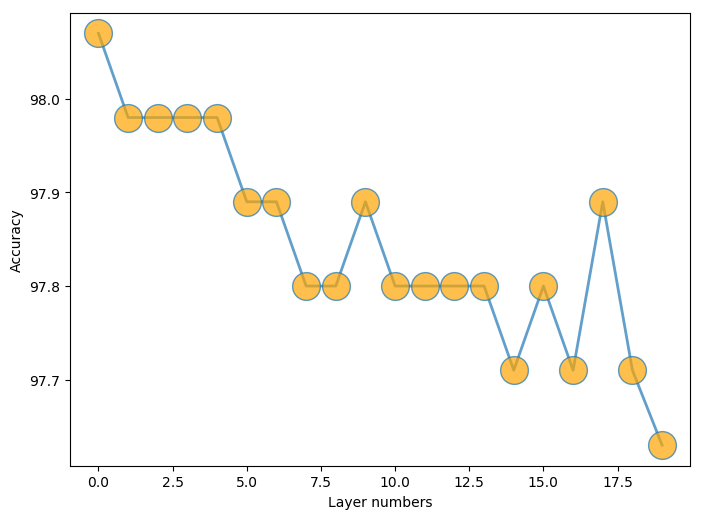

In [14]:
print ("Opt_layer_num =",Accuracy.index(max(Accuracy)), " Accuracy =", max(Accuracy) ,
       "Time =" , np.sum(t[0:Accuracy.index(max(Accuracy))+1]))

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=100)
plt.plot(Accuracy, '-o', ms=20, lw=2, alpha=0.7, mfc='orange')
plt.ylabel('Accuracy')
plt.xlabel('Layer numbers')
plt.show()

In [15]:
Accuracy

[98.07,
 97.98,
 97.98,
 97.98,
 97.98,
 97.89,
 97.89,
 97.8,
 97.8,
 97.89,
 97.8,
 97.8,
 97.8,
 97.8,
 97.71,
 97.8,
 97.71,
 97.89,
 97.71,
 97.63]